Q12 モーションフィルター

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2

imori = cv2.imread("imori.jpg")
noise_imori = cv2.imread("imori_noise.jpg")

def show_image(a):
    img_rgb = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.show()

In [14]:
def padding_0(src):
    return cv2.copyMakeBorder(src,1,1,1,1,cv2.BORDER_CONSTANT,(0,0,0))

def motion_filter(img):
    image = img.copy()
    pad_image = padding_0(img)
    h,w,_ = img.shape
    motion_matrix = np.array([ [1/3, 0, 0],
                               [0, 1/3, 0],
                               [0, 0, 1/3] ])
    
    for i in range(1,w):
        for j in range(1,h):
            b = np.array(pad_image[i-1:i+2,j-1:j+2,0])*motion_matrix
            g = np.array(pad_image[i-1:i+2,j-1:j+2,1])*motion_matrix
            r = np.array(pad_image[i-1:i+2,j-1:j+2,2])*motion_matrix
            
            image[i-1,j-1,0] = b.sum()
            image[i-1,j-1,1] = g.sum()
            image[i-1,j-1,2] = r.sum()
    return image

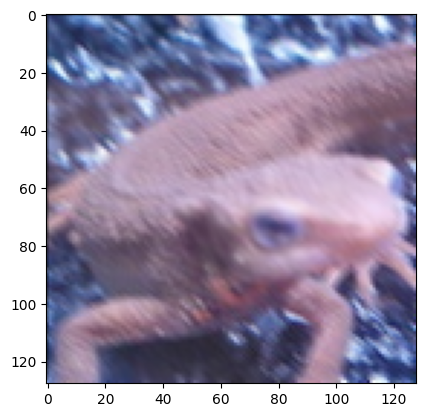

In [16]:
q12_img = motion_filter(imori)
show_image(q12_img)